In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import os

class draw_data:
    def __init__(self, **kwargs):
        self.loss_list = kwargs.get('loss_list', [])
        self.opt_gap_list = kwargs.get('optgap_list', [])
        self.psnr_list = kwargs.get('psnr_list', [])
        self.ssim_list = kwargs.get('ssim_list', [])
        self.acc_train_list = kwargs.get('acc_train_list', [])
        self.acc_test_list = kwargs.get('acc_test_list', [])

def get_data(path,name=''):
    if path.split('_')[0] == 'fmnist':
        loss = np.load(path+'/loss'+name+'.npy')
        optgap = np.load(path+'/opt_gap'+name+'.npy')
        psnr = np.load(path+'/psnr'+name+'.npy')
        ssim = np.load(path+'/ssim'+name+'.npy')
        return draw_data(loss_list=loss, optgap_list=optgap, psnr_list=psnr, ssim_list=ssim)
    else:
        loss = np.load(path+'/loss'+name+'.npy')
        optgap = np.load(path+'/opt_gap'+name+'.npy')
        acc_test  = np.load(path+'/acc_test'+name+'.npy')
        acc_train = np.load(path+'/acc_train'+name+'.npy')
        return draw_data(loss_list=loss, optgap_list=optgap, acc_test_list=acc_test, acc_train_list=acc_train)

# dir = 'covtype_mlp'
dir = '对比试验 2025年06月27日17时15分51秒'
AB_VRDAGT_Instance = get_data('../draw/'+dir,'AB_VRDAGT')
AB_DAGT_Instance = get_data('../draw/'+dir,'AB_DAGT')
AB_SAGA_Instance = get_data('../draw/'+dir,'AB_SAGA')
GT_VR_Instance = get_data('../draw/'+dir,'GT_VR')

In [8]:
plt.rcParams['font.family']=' Times New Roman, SimSun'# 设置字体族，中文为SimSun，英文为Times New Roman
plt.rc('text', usetex=True)
# 绘制机器学习任务
marksize = 3.5
T = 6000
step = 4
index=range(0,T+T//100,T//100)

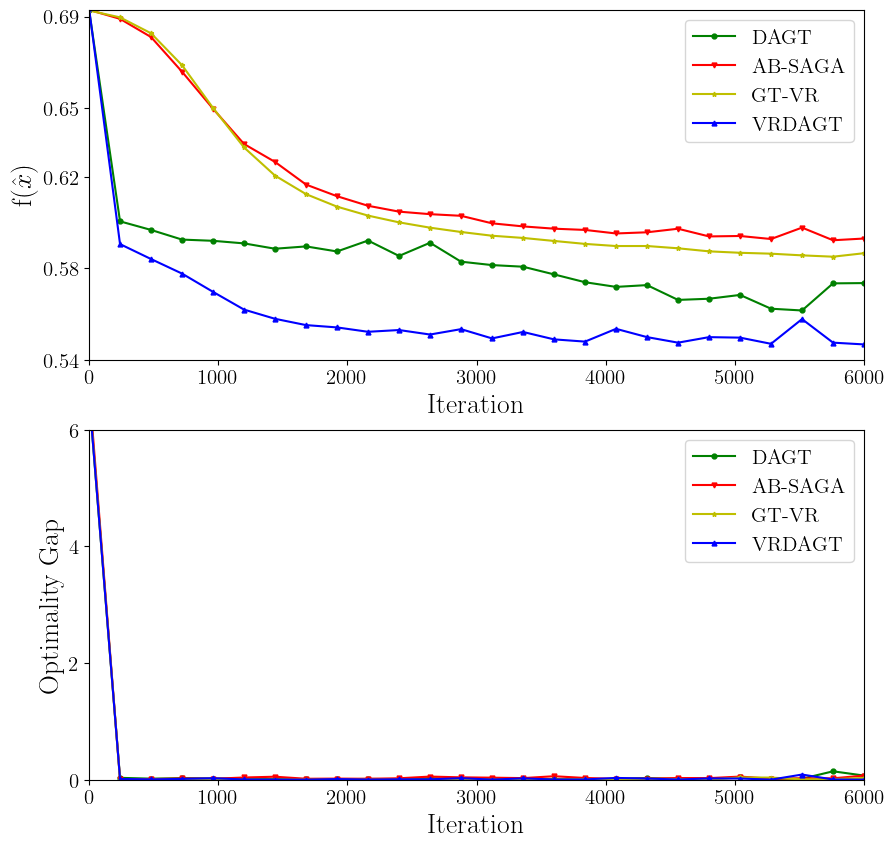

In [14]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
ax[0].set_xlabel('Iteration',fontsize=20)
ax[0].set_ylabel(r'f($\hat{x}$)',fontsize=20)
ax[0].plot(index[::step],AB_DAGT_Instance.loss_list[::step],'go-',label='DAGT',markersize=marksize)
ax[0].plot(index[::step],AB_SAGA_Instance.loss_list[::step],'rv-',label='AB-SAGA',markersize=marksize)
ax[0].plot(index[::step],GT_VR_Instance.loss_list[::step],'y*-',label='GT-VR',markersize=marksize)
ax[0].plot(index[::step],AB_VRDAGT_Instance.loss_list[::step],'b^-',label='VRDAGT',markersize=marksize)
ax[0].legend(fontsize=15,loc='upper right')
ax[0].tick_params(labelsize=15)
begin = -15
end = -2
# #局部放大图
# axins_loss = ax[0].inset_axes([0.6, 0.25, 0.2, 0.2])
# axins_loss.plot(index[begin:end],AB_SAGA_Instance.loss_list[begin:end],'rv-',label='AB-SAGA',markersize=marksize,markevery=5)
# axins_loss.plot(index[begin:end],GT_VR_Instance.loss_list[begin:end],'y*-',label='GT-VR',markersize=marksize,markevery=5)

# # 设定放大区域
# min_val = min(min(AB_SAGA_Instance.loss_list[begin:end]), min(GT_VR_Instance.loss_list[begin:end]))
# max_val = max(max(AB_SAGA_Instance.loss_list[begin:end]), max(GT_VR_Instance.loss_list[begin:end]))

# x1, x2, y1, y2 = index[begin], index[end-1], min_val, max_val
# axins_loss.set_xlim(x1, x2)
# axins_loss.set_ylim(y1, y2)
# # # 添加连接线
# mark_inset(ax[0], axins_loss, loc1=2, loc2=4, fc="none", ec='0.5')

ax[1].set_xlabel('Iteration',fontsize=20)
ax[1].set_ylabel('Optimality Gap',fontsize=20)
ax[1].plot(index[::step],AB_DAGT_Instance.opt_gap_list[::step],'go-',label='DAGT',markersize=marksize)
ax[1].plot(index[::step],AB_SAGA_Instance.opt_gap_list[::step],'rv-',label='AB-SAGA',markersize=marksize)
ax[1].plot(index[::step],GT_VR_Instance.opt_gap_list[::step],'y*-',label='GT-VR',markersize=marksize)
ax[1].plot(index[::step],AB_VRDAGT_Instance.opt_gap_list[::step],'b^-',label='VRDAGT',markersize=marksize)
ax[1].tick_params(labelsize=15)
ax[1].legend(fontsize=15,loc='upper right')
ax[0].axis([0, T, 0.54, AB_DAGT_Instance.loss_list[0]])
ax[1].axis([0, T, 0,6])
ax[0].set_yticks([round(i,2) for i  in np.arange(0.54, AB_DAGT_Instance.loss_list[0]+(AB_DAGT_Instance.loss_list[0]-0.54)/4, (AB_DAGT_Instance.loss_list[0]-0.54)/4)])
ax[1].set_yticks([0,2,4,6])
plt.savefig('../draw/'+dir+'/Covtype_MLP_loss_optgap.pdf',bbox_inches='tight')
plt.show()

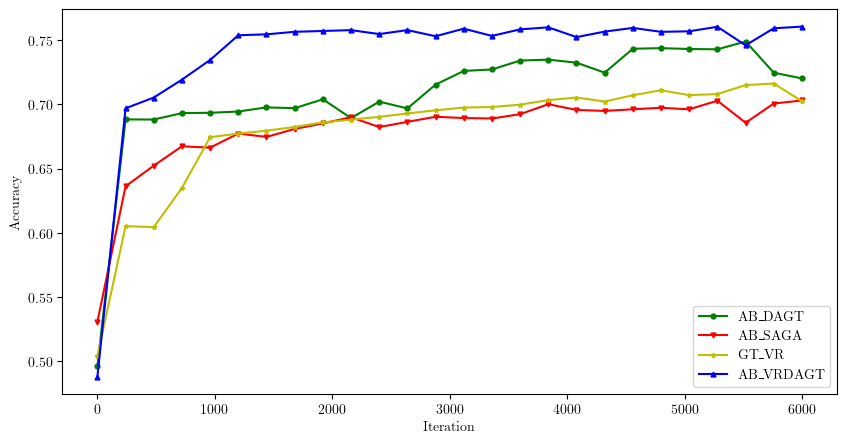

In [10]:
# 绘制acc准确率
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel('Iteration')
ax.set_ylabel('Accuracy')
ax.plot(index[::step],AB_DAGT_Instance.acc_train_list[::step],'go-',label='AB_DAGT',markersize=marksize)
ax.plot(index[::step],AB_SAGA_Instance.acc_train_list[::step],'rv-',label='AB_SAGA',markersize=marksize)
ax.plot(index[::step],GT_VR_Instance.acc_train_list[::step],'y*-',label='GT_VR',markersize=marksize)
ax.plot(index[::step],AB_VRDAGT_Instance.acc_train_list[::step],'b^-',label='AB_VRDAGT',markersize=marksize)
ax.legend()
# # 局部放大图，放大后100个点
# axins_acc = ax.inset_axes([0.3, 0.4, 0.2, 0.2])
# axins_acc.plot(range(Tend00,T),AB_DAGT_Instance.acc_train_list[Tend00:],'go-',label='AB_DAGT',markersize=marksize,markevery=2)
# axins_acc.plot(range(Tend00,T),AB_VRDAGT_Instance.acc_train_list[Tend00:],'b^-',label='AB_VRDAGT',markersize=marksize,markevery=2)
# # 设定放大区域
# x1, x2, y1, y2 = Tend00, T, min(AB_DAGT_Instance.acc_train_list[Tend00:])-0.005, max(AB_VRDAGT_Instance.acc_train_list[Tend00:])+0.005
# axins_acc.set_xlim(x1, x2)
# axins_acc.set_ylim(y1, y2)
# mark_inset(ax, axins_acc, loc1=2, loc2=1, fc="none", ec='0.5')

# axins_acc = ax.inset_axes([0.6, 0.4, 0.2, 0.2])
# axins_acc.plot(range(Tend00,T),AB_SAGA_Instance.acc_train_list[Tend00:],'rv-',label='AB_SAGA',markersize=marksize,markevery=2)
# axins_acc.plot(range(Tend00,T),GT_VR_Instance.acc_train_list[Tend00:],'y*-',label='GT_VR',markersize=marksize,markevery=2)
# # 设定放大区域
# x1, x2, y1, y2 = Tend00, T, min(GT_VR_Instance.acc_train_list[Tend00:])-0.005, max(AB_SAGA_Instance.acc_train_list[Tend00:])+0.005
# axins_acc.set_xlim(x1, x2)
# axins_acc.set_ylim(y1, y2)
# 添加连接线
# mark_inset(ax, axins_acc, loc1=2, loc2=1, fc="none", ec='0.5')
plt.savefig('../draw/'+dir+'/acc_train.pdf',bbox_inches='tight')
plt.show()


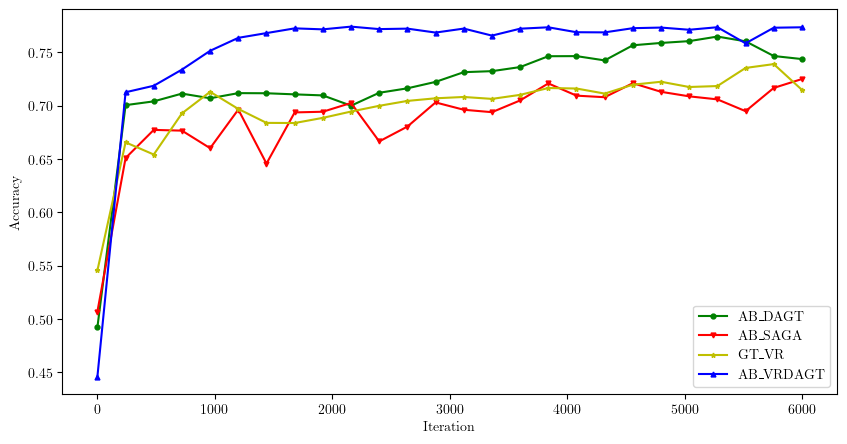

In [11]:
# 绘制acc准确率
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel('Iteration')
ax.set_ylabel('Accuracy')
ax.plot(index[::step],AB_DAGT_Instance.acc_test_list[::step],'go-',label='AB_DAGT',markersize=marksize)
ax.plot(index[::step],AB_SAGA_Instance.acc_test_list[::step],'rv-',label='AB_SAGA',markersize=marksize)
ax.plot(index[::step],GT_VR_Instance.acc_test_list[::step],'y*-',label='GT_VR',markersize=marksize)
ax.plot(index[::step],AB_VRDAGT_Instance.acc_test_list[::step],'b^-',label='AB_VRDAGT',markersize=marksize)
ax.legend()

plt.savefig('../draw/'+dir+'/acc_test.pdf',bbox_inches='tight')
plt.show()
